
# Exploratory Data Analysis (EDA) for Diabetes Prediction Dataset

This notebook presents a structured Exploratory Data Analysis (EDA) of the diabetes prediction dataset.
The goal of this EDA is to understand the data's underlying patterns, relationships, and distributions,
with a specific focus on exploring factors that might contribute to diabetes.



## Loading and Previewing the Dataset

In this section, we load the diabetes prediction dataset and preview its initial rows to get a general understanding of its structure.


In [1]:

import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes_data.csv', delimiter=';')

# Display the first few rows of the dataset
data.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1



## Basic Data Information

### Data Types and Missing Values
Here, we examine the data types of each feature and check for any missing values that need to be addressed.


In [2]:

# Check data types
data.dtypes

# Check for missing values
data.isnull().sum()


age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64


## Check for Duplicate Data

This step identifies any duplicate rows in the dataset, as they may affect the analysis and predictions.


In [14]:
# Checking for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display duplicate rows if any
if duplicate_count > 0:
    print("Duplicate rows:")
    display(data[data.duplicated()])

    # Removing duplicates
    data = data.drop_duplicates()


Number of duplicate rows: 0


## Check for Missing Values

Visualize missing values to identify patterns.

In [15]:
import seaborn as sns

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values per Column:")
display(missing_values[missing_values > 0])

# Visualize missing data pattern if there are any
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Data Pattern")
    plt.show()


Missing Values per Column:


Series([], dtype: int64)

## Outlier Detection
Detect and visualize outliers to understand data distribution, especially in numeric fields like age.

C:\Users\2004a\AppData\Local\Temp\ipykernel_11844\2205799018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="age", y="class", palette="Set2")


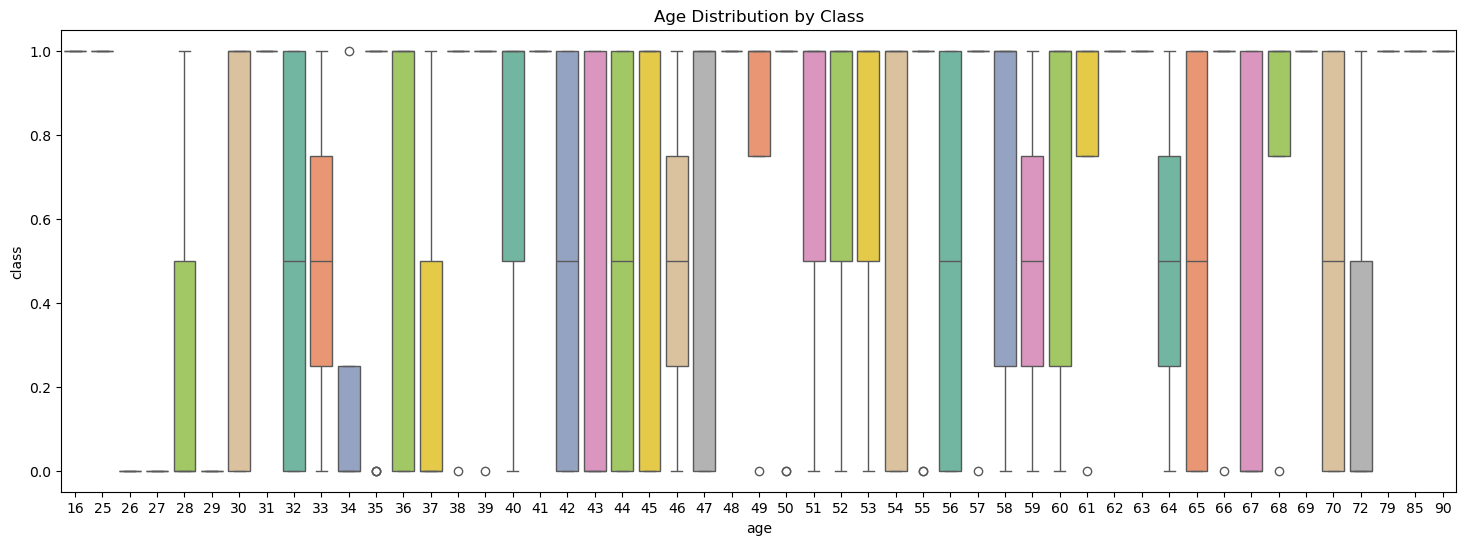

In [17]:
# Boxplot to detect outliers in numeric fields
plt.figure(figsize=(18, 6))
sns.boxplot(data=data, x="age", y="class", palette="Set2")
plt.title("Age Distribution by Class")
plt.show()



## Descriptive Statistics

This section provides summary statistics for the numerical features in the dataset, giving insights into their distributions and ranges.


In [3]:

# Summary statistics for numerical features
data.describe()


,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



## Target Variable Distribution

Let's examine the distribution of the target variable, representing diabetes classification (`class`), to understand the balance between diabetic and non-diabetic individuals.


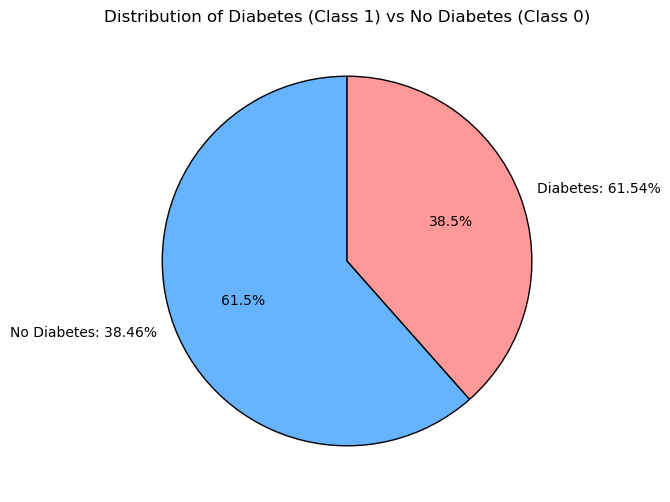

In [4]:

# Distribution of the target variable
import matplotlib.pyplot as plt

# Count and percentage for the target variable
class_counts = data['class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=[f"No Diabetes: {class_percentages[0]:.2f}%", 
                              f"Diabetes: {class_percentages[1]:.2f}%"], 
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'], 
        wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Diabetes (Class 1) vs No Diabetes (Class 0)')
plt.show()



## Univariate Analysis

We analyze individual features, focusing on the distributions of age and gender.



### Age Distribution


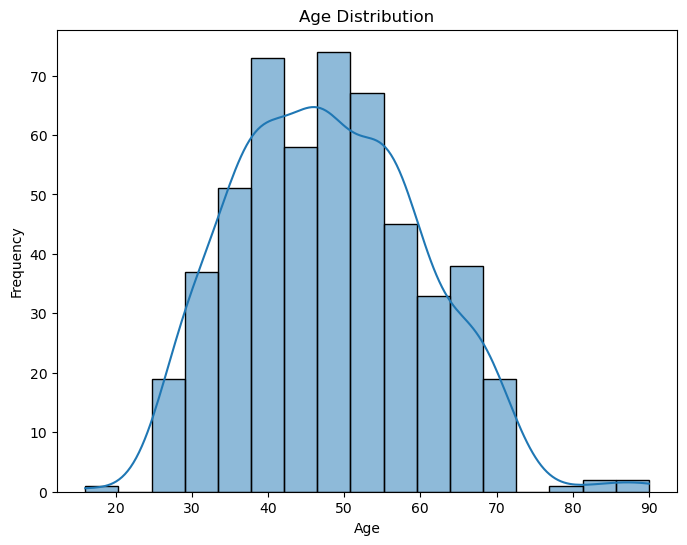

In [5]:

import seaborn as sns

# Age distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



### Gender Distribution


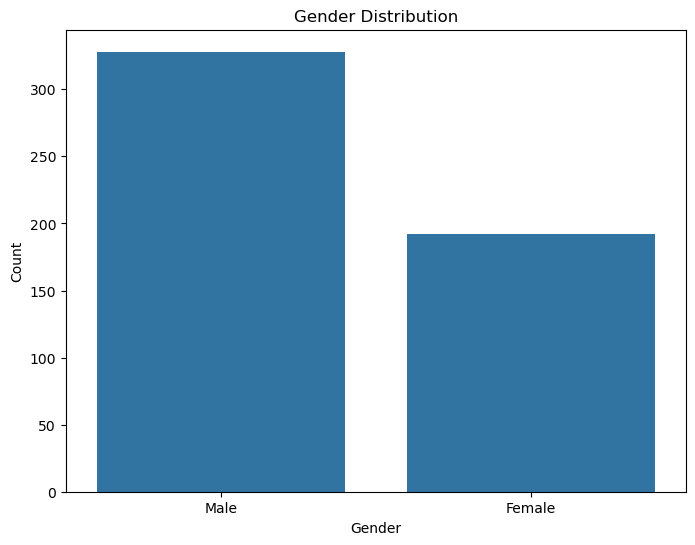

Gender Distribution:
Male: Count = 328, Percentage = 63.08%
Female: Count = 192, Percentage = 36.92%


In [6]:

# Bar plot for gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Displaying counts and percentages
gender_counts = data['gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
print("Gender Distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: Count = {count}, Percentage = {gender_percentages[gender]:.2f}%")



## Bivariate Analysis

This section examines relationships between the target variable and individual features.



### Age Distribution by Diabetes Classification


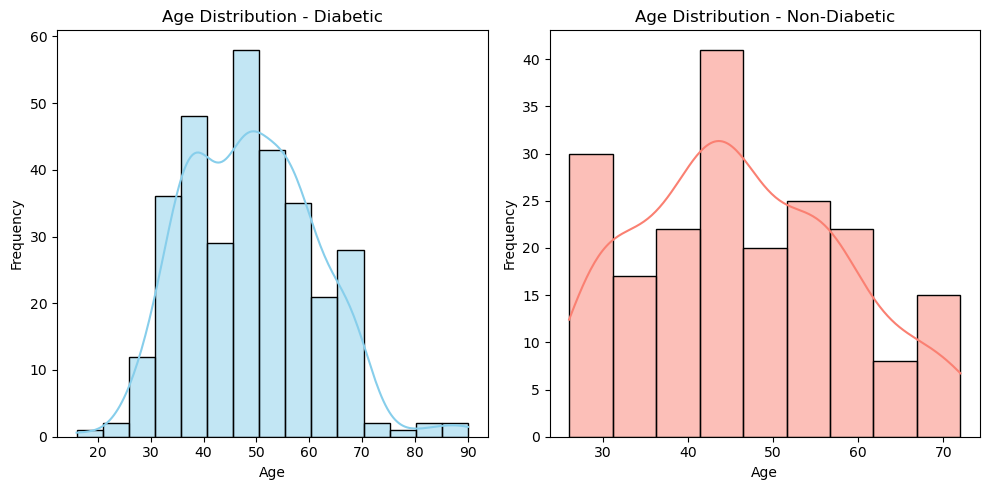

In [7]:

# Age distribution by diabetes classification
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

plt.figure(figsize=(10, 5))

# Diabetic individuals
plt.subplot(1, 2, 1)
sns.histplot(diabetic_data['age'], kde=True, color='skyblue')
plt.title("Age Distribution - Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Non-diabetic individuals
plt.subplot(1, 2, 2)
sns.histplot(non_diabetic_data['age'], kde=True, color='salmon')
plt.title("Age Distribution - Non-Diabetic")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()



## Multivariate Analysis

We explore correlations between numerical features to identify any strong relationships.



### Correlation Matrix


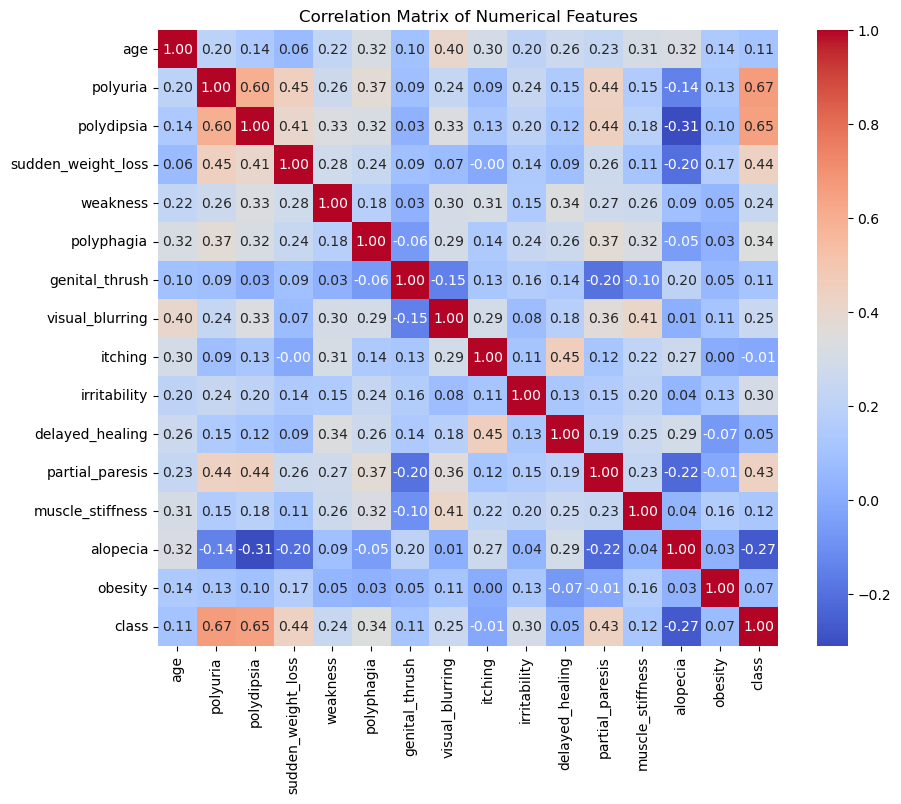

In [8]:

# Correlation matrix
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



## Symptom Comparison Between Diabetic and Non-Diabetic Patients

This section presents a comparison of symptoms between diabetic and non-diabetic patients through side-by-side pie charts.


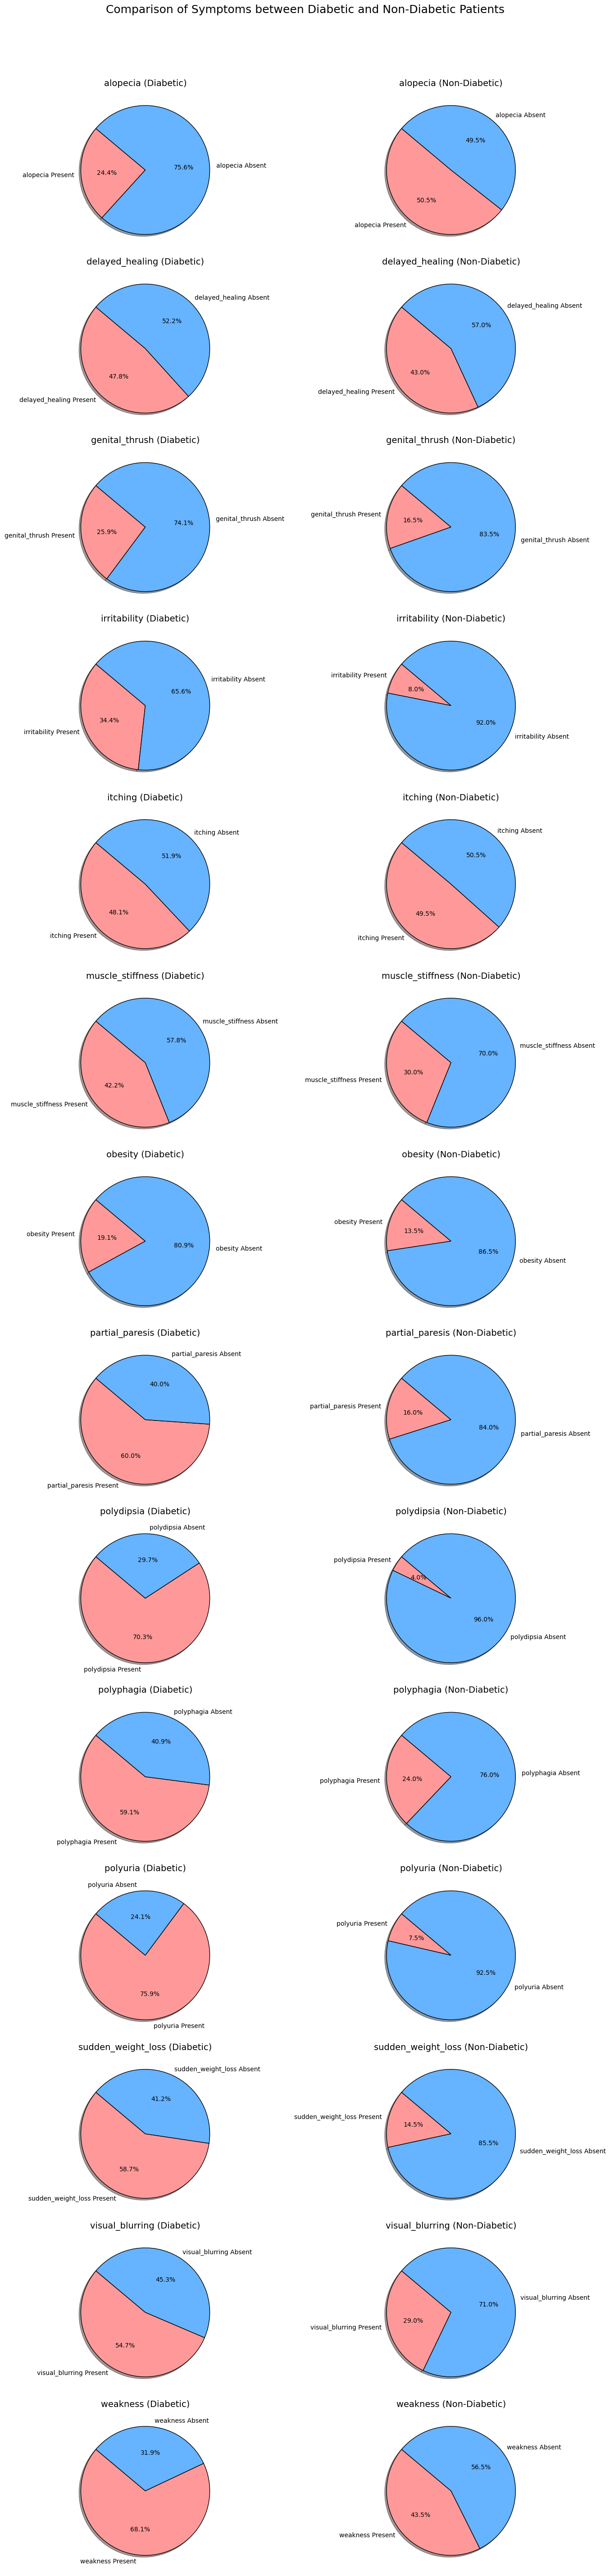

In [10]:

import matplotlib.pyplot as plt

# Separate diabetic and non-diabetic data
diabetic_data = data[data['class'] == 1]
non_diabetic_data = data[data['class'] == 0]

# Calculate the total number of diabetic and non-diabetic patients
total_diabetic = len(diabetic_data)
total_non_diabetic = len(non_diabetic_data)

# Get all symptom columns (excluding age, gender, and class)
symptom_columns = data.columns.difference(['age', 'gender', 'class'])

# Set up the plotting layout
num_symptoms = len(symptom_columns)
fig, axes = plt.subplots(num_symptoms, 2, figsize=(14, num_symptoms * 4))
fig.suptitle("Comparison of Symptoms between Diabetic and Non-Diabetic Patients", y=1.02, fontsize=18)

# Generate side-by-side pie charts for each symptom
for i, symptom in enumerate(symptom_columns):
    # Calculate the counts for each symptom in both groups
    diabetic_count = diabetic_data[symptom].sum()
    non_diabetic_count = non_diabetic_data[symptom].sum()
    
    # Calculate the absence of the symptom in each group
    diabetic_no_symptom = total_diabetic - diabetic_count
    non_diabetic_no_symptom = total_non_diabetic - non_diabetic_count
    
    # Prepare data for pie charts
    diabetic_counts = [diabetic_count, diabetic_no_symptom]
    non_diabetic_counts = [non_diabetic_count, non_diabetic_no_symptom]
    
    # Define labels and colors
    labels = [f'{symptom} Present', f'{symptom} Absent']
    colors = ['#ff9999','#66b3ff']
    
    # Diabetic patients pie chart
    wedges1, texts1, autotexts1 = axes[i, 0].pie(diabetic_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, wedgeprops={"edgecolor": "black"})
    axes[i, 0].set_title(f"{symptom} (Diabetic)", fontsize=14)

    # Non-diabetic patients pie chart
    wedges2, texts2, autotexts2 = axes[i, 1].pie(non_diabetic_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, wedgeprops={"edgecolor": "black"})
    axes[i, 1].set_title(f"{symptom} (Non-Diabetic)", fontsize=14)

# Adjust layout to prevent overlapping of titles and legends
plt.tight_layout()
plt.show()



## Radar Plot for Symptom Comparison

The radar plot compares the presence of each symptom between diabetic and non-diabetic patients, providing an overview of common symptoms in each group.


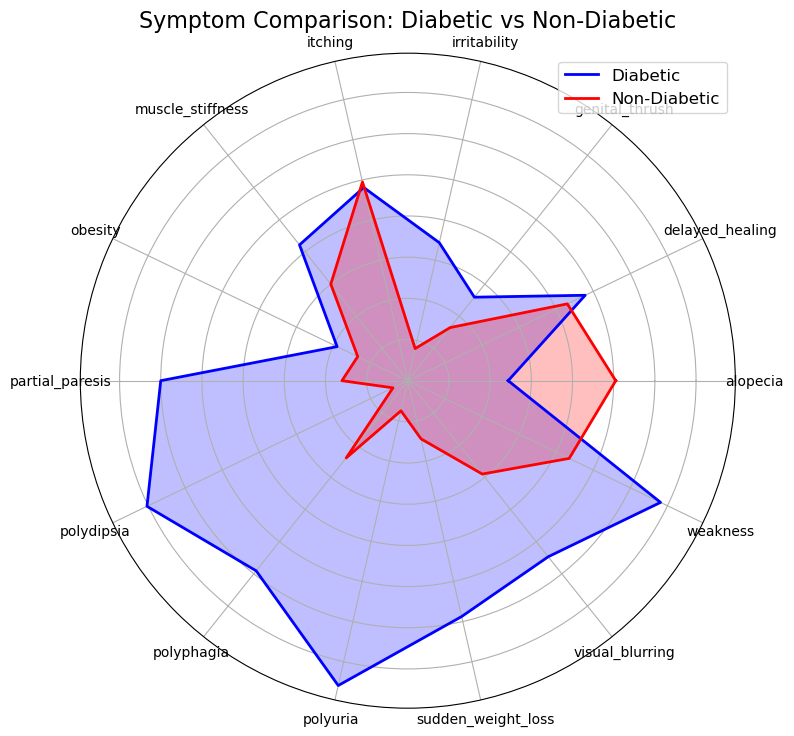

In [11]:

import numpy as np

# List of symptom columns
symptom_columns = data.columns.difference(['age', 'gender', 'class'])

# Aggregate the data by calculating the mean for each symptom (percentage of people with the symptom)
diabetic_symptom_data = data[data['class'] == 1][symptom_columns].mean()
non_diabetic_symptom_data = data[data['class'] == 0][symptom_columns].mean()

# Function to create a radar plot
def radar_plot(data1, data2, categories, title='Radar Plot'):
    # Number of variables (symptoms)
    num_vars = len(categories)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is circular, so the first point is repeated to close the circle
    data1 = data1.tolist()
    data2 = data2.tolist()
    data1.append(data1[0])
    data2.append(data2[0])
    angles.append(angles[0])

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot data for Diabetic individuals
    ax.plot(angles, data1, color='blue', linewidth=2, label='Diabetic', linestyle='solid')
    ax.fill(angles, data1, color='blue', alpha=0.25)

    # Plot data for Non-Diabetic individuals
    ax.plot(angles, data2, color='red', linewidth=2, label='Non-Diabetic', linestyle='solid')
    ax.fill(angles, data2, color='red', alpha=0.25)

    # Set the labels and title
    ax.set_yticklabels([])  # Hide radial ticks
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, rotation=45, fontsize=10)
    ax.set_title(title, fontsize=16)
    
    # Add a legend
    plt.legend(loc='upper right', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Create Radar Plot comparing diabetic and non-diabetic individuals
radar_plot(diabetic_symptom_data, non_diabetic_symptom_data, symptom_columns, title='Symptom Comparison: Diabetic vs Non-Diabetic')



## Permutation Feature Importance

Permutation feature importance scores are calculated for the symptoms, indicating their predictive power in the diabetes prediction model.


C:\Users\2004a\AppData\Local\Temp\ipykernel_11844\3316751510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Symptom', data=perm_importance_df, palette="viridis")


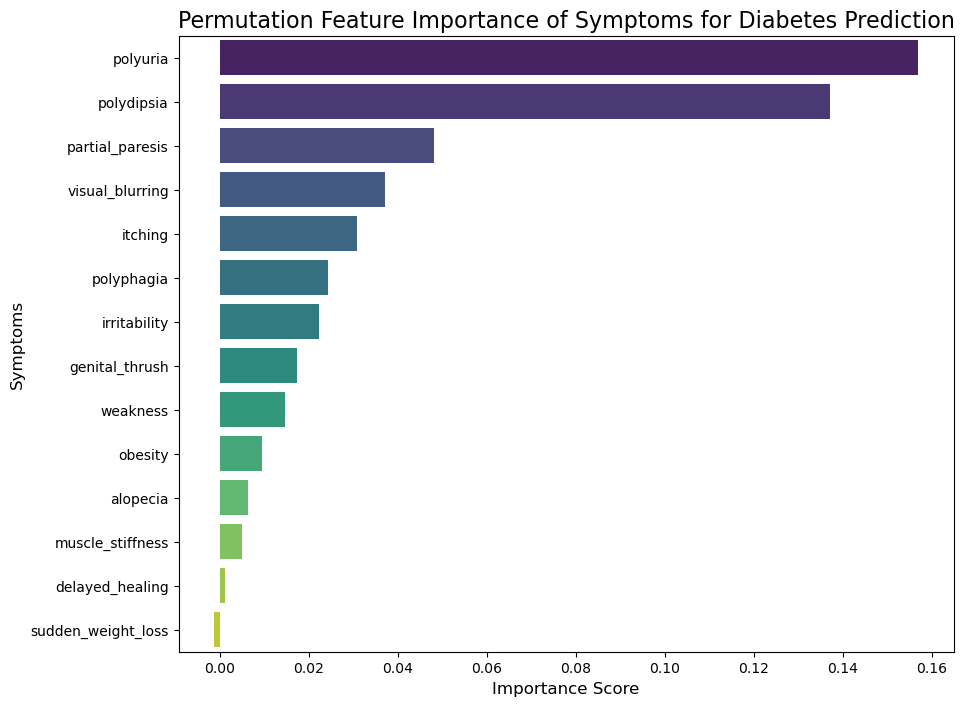

In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# Assuming data has been split into features and target
X = data[symptom_columns]  # Select symptom columns as features
y = data['class']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get permutation feature importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for easier plotting
perm_importance_df = pd.DataFrame({
    'Symptom': symptom_columns,
    'Importance': perm_importance.importances_mean
})

# Sort by importance score in descending order
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot the permutation feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Symptom', data=perm_importance_df, palette="viridis")
plt.title("Permutation Feature Importance of Symptoms for Diabetes Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Symptoms", fontsize=12)
plt.show()



## Conclusions

This EDA provided insights into the distributions of features and highlighted potential relationships between them. Age and gender appear to vary by diabetes status, and certain features show moderate correlations, which may assist in further predictive modeling.
